<a href="https://colab.research.google.com/github/VisionaRx/Hackbio-bioinformatics-internship/blob/main/Merged_stage2_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Task 2.1

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/mcgc.tsv', sep='\t')
df.head(100)

,time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
0,0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,15,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,30,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,45,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,60,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1380,1.207,1.131,1.209,1.008,1.207,1.209,1.207,1.209,1.209,...,1.208,0.943,1.131,0.964,1.163,1.208,1.180,1.118,1.209,1.208
93,1395,1.207,1.137,1.209,1.011,1.208,1.209,1.208,1.209,1.209,...,1.208,0.948,1.137,0.968,1.168,1.208,1.183,1.124,1.209,1.208
94,1410,1.207,1.143,1.209,1.014,1.208,1.209,1.208,1.209,1.209,...,1.208,0.952,1.143,0.971,1.172,1.208,1.186,1.130,1.209,1.208
95,1425,1.207,1.148,1.209,1.017,1.209,1.209,1.209,1.209,1.209,...,1.208,0.956,1.148,0.974,1.176,1.208,1.189,1.136,1.209,1.208


In [ ]:
meta = pd.read_csv('https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/mcgc_METADATA.txt', sep='\t')
meta

,Strain,WT,MUT,WT.1,MUT.1,WT.2,MUT.2
0,Strain1_Rep1,A1,A2,B1,B2,C1,C2
1,Strain1_Rep2,A3,A4,B3,B4,C3,C4
2,Strain2_Rep1,A5,A6,B5,B6,C5,C6
3,Strain2_Rep2,A7,A8,B7,B8,C7,C8
4,Strain3_Rep1,A9,A10,B9,B10,C9,C10
5,Strain2_Rep2,A11,A12,B11,B12,C11,C12


<Figure size 1500x500 with 0 Axes>

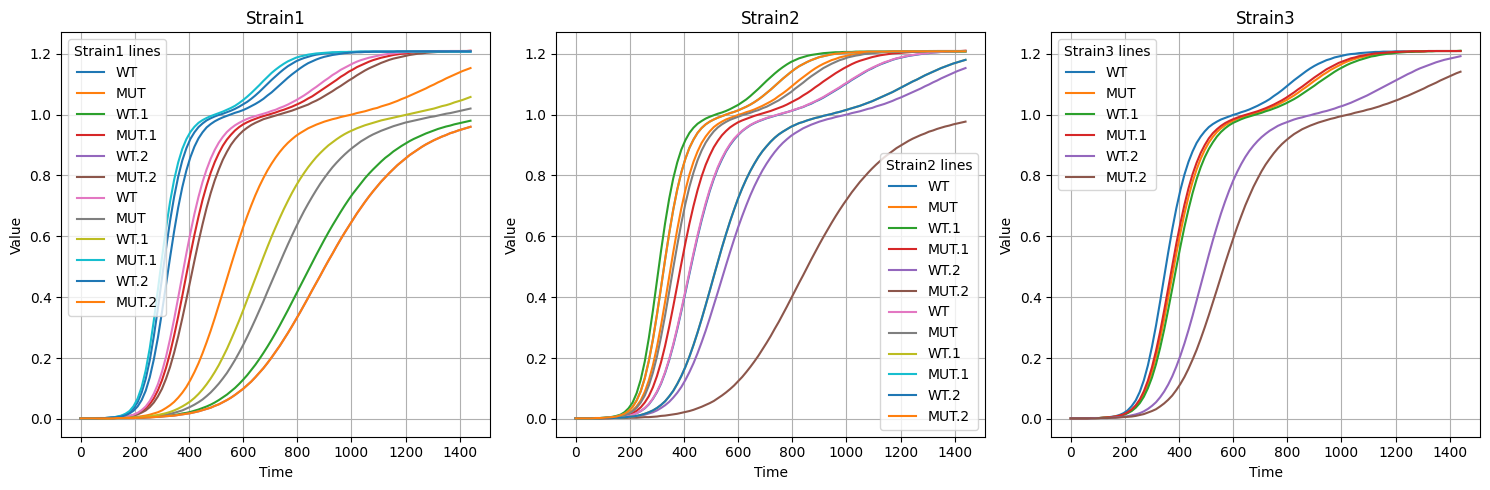

In [ ]:

plt.figure(figsize=(15, 5))

def plot_line(strain, ax):
    strain_data = meta[meta['Strain'] == strain].drop('Strain', axis=1)
    for column_value in strain_data.values[0]:
        sns.lineplot(x=df['time'], y=df[column_value], label=meta.columns[meta.isin([column_value]).any()][0], ax=ax)
    ax.legend(title=f"{strain[0:-5]} lines")
    ax.set_title(strain[0:-5])
    ax.set_xlabel("Time")
    ax.set_ylabel("Value")
    ax.grid(True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

plot_line('Strain1_Rep1', ax1)
plot_line('Strain1_Rep2', ax1)

plot_line('Strain2_Rep1', ax2)
plot_line('Strain2_Rep2', ax2)

plot_line('Strain3_Rep1', ax3)

plt.tight_layout()

plt.show()

In [ ]:
new_df_data = {
            'Strain':[],
            'Column':[],
            'Time_80%':[],
            'Max Value':[]
        }
def time_capacity(strain):
    strain_data = meta[meta['Strain'] == strain].drop('Strain', axis=1)
    for column_value in strain_data.values[0]:
        column = meta.columns[meta.isin([column_value]).any()][0]
        min_diff = abs(df[column_value] - (df[column_value].max() * 0.8)).idxmin()
        max_value = df.loc[min_diff, column_value]
        time = df.loc[min_diff, 'time']
        new_df_data['Strain'].append(strain)
        new_df_data['Column'].append(column)
        new_df_data['Time_80%'].append(time)
        new_df_data['Max Value'].append(max_value)

time_capacity("Strain1_Rep1")
time_capacity("Strain1_Rep2")
time_capacity("Strain2_Rep1")
time_capacity("Strain2_Rep2")
time_capacity("Strain3_Rep1")
new_df = pd.DataFrame(new_df_data)
new_df

,Strain,Column,Time_80%,Max Value
0,Strain1_Rep1,WT,450,0.971
1,Strain1_Rep1,MUT,780,0.919
2,Strain1_Rep1,WT.1,1050,0.791
3,Strain1_Rep1,MUT.1,600,0.968
4,Strain1_Rep1,WT.2,1095,0.764
5,Strain1_Rep1,MUT.2,630,0.966
6,Strain1_Rep2,WT,570,0.965
7,Strain1_Rep2,MUT,915,0.810
8,Strain1_Rep2,WT.1,855,0.844
9,Strain1_Rep2,MUT.1,420,0.960


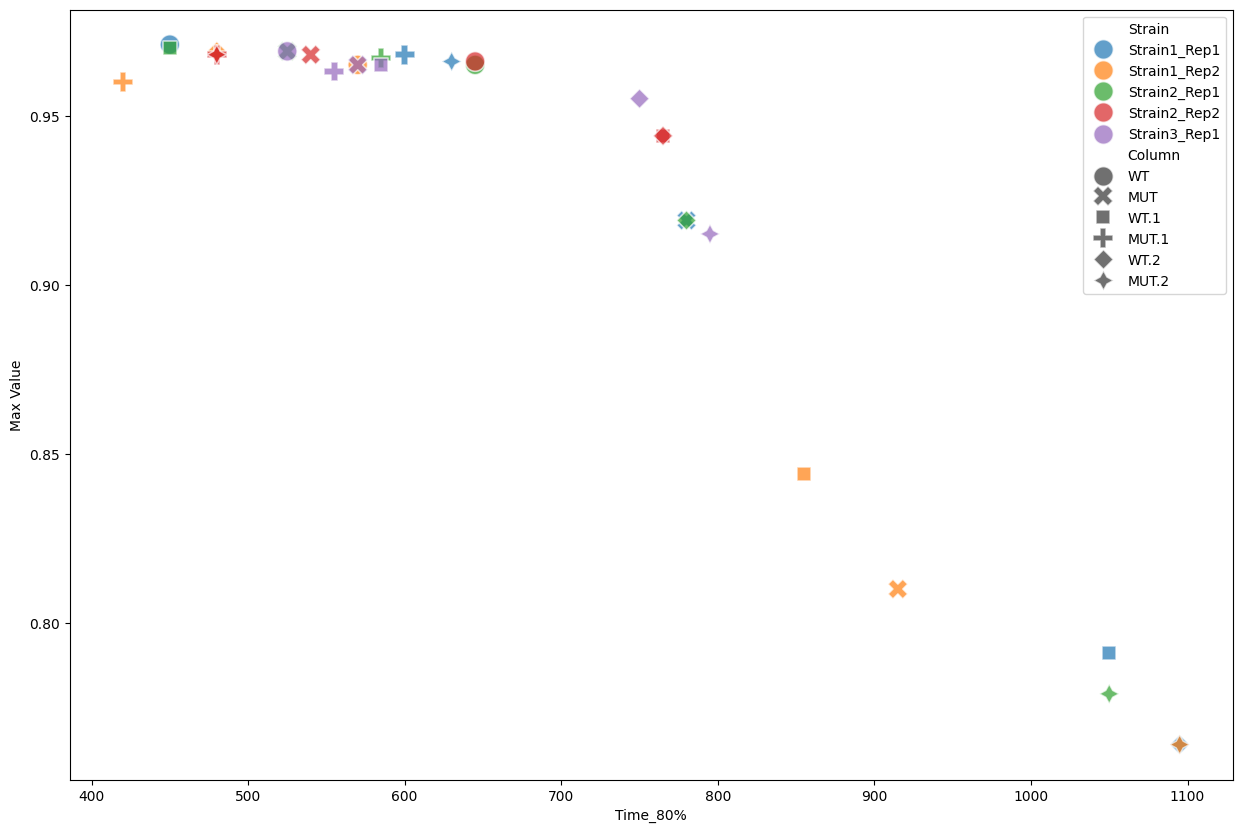

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Time_80%', y='Max Value', hue='Strain', data=new_df,style='Column', s=200, alpha=0.7)
plt.show()

In [ ]:
new_df['Strain'] = new_df['Strain'].str.replace(r'_Rep[12]', '', regex=True)
new_df['Column'] = new_df['Column'].str.replace(r'WT.[12]', 'WT', regex=True)
new_df['Column'] = new_df['Column'].str.replace(r'MUT.[12]', 'MUT', regex=True)
new_df.head()

,Strain,Column,Time_80%,Max Value
0,Strain1,WT,450,0.971
1,Strain1,MUT,780,0.919
2,Strain1,WT,1050,0.791
3,Strain1,MUT,600,0.968
4,Strain1,WT,1095,0.764


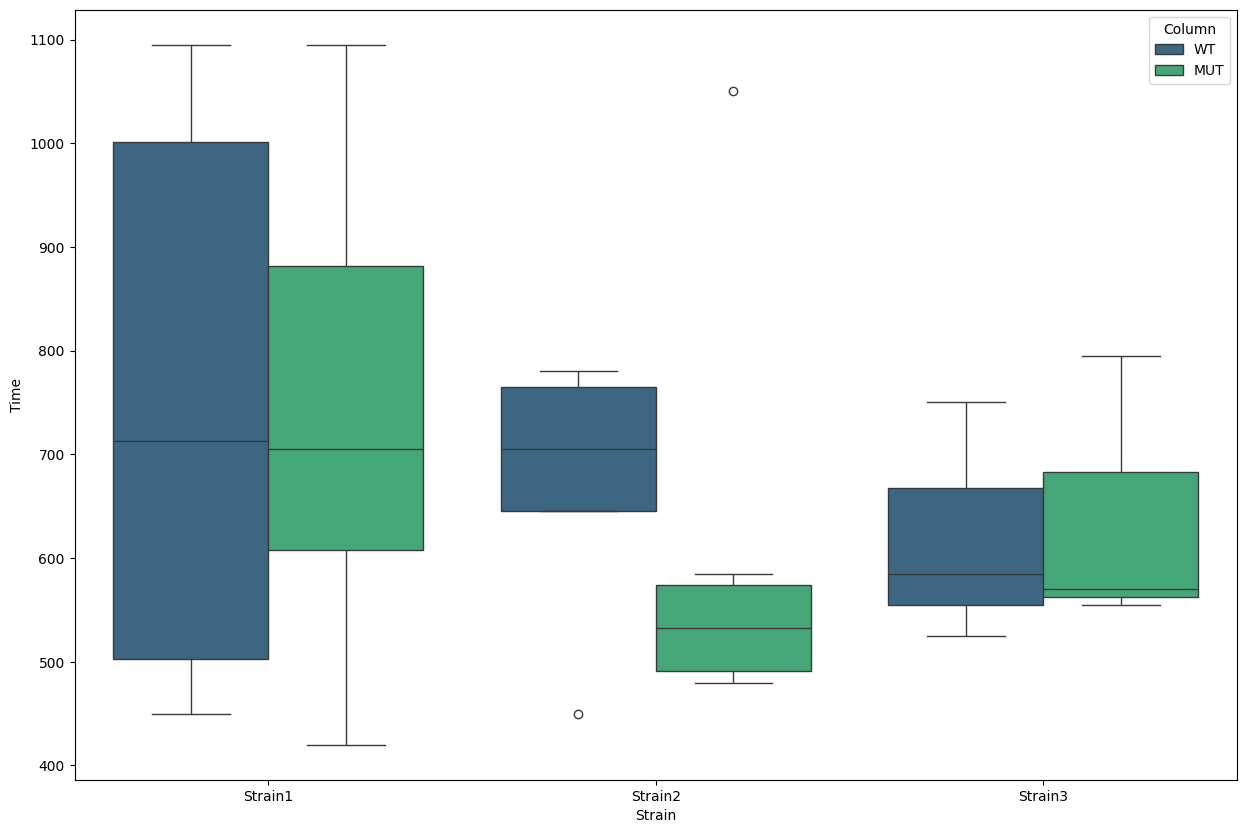

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Strain', y='Time_80%', data=new_df, palette='viridis', hue='Column')
plt.xlabel('Strain')
plt.ylabel('Time')
plt.show()

In [ ]:
from scipy.stats import shapiro, levene

# Separate data into WT and MUT
wt_time = new_df[new_df['Column'] == 'WT']['Time_80%']
mut_time = new_df[new_df['Column'] == 'MUT']['Time_80%']

# Normality test
print("Shapiro-Wilk test for WT:", shapiro(wt_time))
print("Shapiro-Wilk test for MUT:", shapiro(mut_time))

# Homogeneity of variance test
print("Levene's test:", levene(wt_time, mut_time))


Shapiro-Wilk test for WT: ShapiroResult(statistic=0.9234333872334897, pvalue=0.21726185894729516)
Shapiro-Wilk test for MUT: ShapiroResult(statistic=0.8697552834471732, pvalue=0.033462976686995306)
Levene's test: LeveneResult(statistic=0.005596921693068812, pvalue=0.9408957826784303)


In [ ]:
from scipy import stats
from scipy.stats import kruskal

stat, p_value = stats.mannwhitneyu(wt_time, mut_time)
print("T-statistic:", stat)
print("P-value:", p_value)


strain_groups = [new_df[new_df['Strain'] == strain]['Time_80%'] for strain in new_df['Strain'].unique()]
kruskal_stat, kruskal_p = kruskal(*strain_groups)
print(f"Kruskal-Wallis test: H={kruskal_stat:.3f}, p={kruskal_p:.3f}")

# There is no significant differences regarding the time to reach the carrying capacity between the wild type and mutated type because the p-value was larger than 0.05

T-statistic: 122.0
P-value: 0.7085206805370319
Kruskal-Wallis test: H=1.126, p=0.570


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/mcgc.tsv', sep='\t')
df.head(100)

,time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
0,0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,15,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,30,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,45,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,60,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1380,1.207,1.131,1.209,1.008,1.207,1.209,1.207,1.209,1.209,...,1.208,0.943,1.131,0.964,1.163,1.208,1.180,1.118,1.209,1.208
93,1395,1.207,1.137,1.209,1.011,1.208,1.209,1.208,1.209,1.209,...,1.208,0.948,1.137,0.968,1.168,1.208,1.183,1.124,1.209,1.208
94,1410,1.207,1.143,1.209,1.014,1.208,1.209,1.208,1.209,1.209,...,1.208,0.952,1.143,0.971,1.172,1.208,1.186,1.130,1.209,1.208
95,1425,1.207,1.148,1.209,1.017,1.209,1.209,1.209,1.209,1.209,...,1.208,0.956,1.148,0.974,1.176,1.208,1.189,1.136,1.209,1.208


In [1]:
Task 2.4

SyntaxError: invalid syntax (<ipython-input-1-b78d67802f07>, line 1)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/mcgc.tsv', sep='\t')
df.head(100)

,time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
0,0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,15,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,30,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,45,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,60,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1380,1.207,1.131,1.209,1.008,1.207,1.209,1.207,1.209,1.209,...,1.208,0.943,1.131,0.964,1.163,1.208,1.180,1.118,1.209,1.208
93,1395,1.207,1.137,1.209,1.011,1.208,1.209,1.208,1.209,1.209,...,1.208,0.948,1.137,0.968,1.168,1.208,1.183,1.124,1.209,1.208
94,1410,1.207,1.143,1.209,1.014,1.208,1.209,1.208,1.209,1.209,...,1.208,0.952,1.143,0.971,1.172,1.208,1.186,1.130,1.209,1.208
95,1425,1.207,1.148,1.209,1.017,1.209,1.209,1.209,1.209,1.209,...,1.208,0.956,1.148,0.974,1.176,1.208,1.189,1.136,1.209,1.208


In [ ]:
meta = pd.read_csv('https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/mcgc_METADATA.txt', sep='\t')
meta

,Strain,WT,MUT,WT.1,MUT.1,WT.2,MUT.2
0,Strain1_Rep1,A1,A2,B1,B2,C1,C2
1,Strain1_Rep2,A3,A4,B3,B4,C3,C4
2,Strain2_Rep1,A5,A6,B5,B6,C5,C6
3,Strain2_Rep2,A7,A8,B7,B8,C7,C8
4,Strain3_Rep1,A9,A10,B9,B10,C9,C10
5,Strain2_Rep2,A11,A12,B11,B12,C11,C12


<Figure size 1500x500 with 0 Axes>

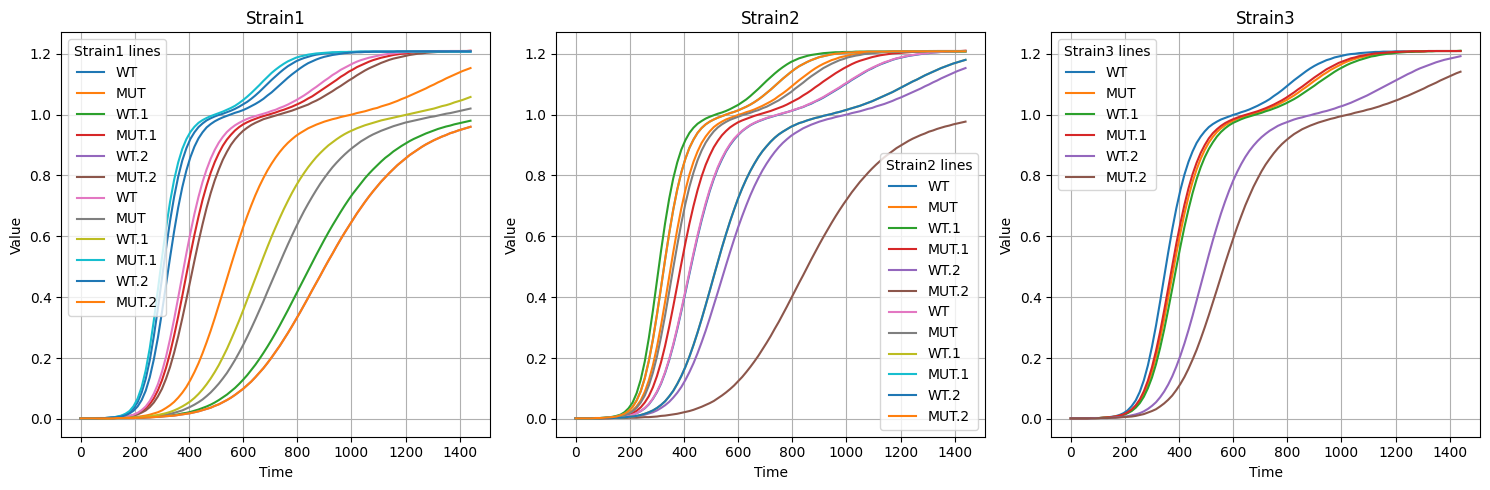

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall figure size (width, height) in inches
plt.figure(figsize=(15, 5))  # Adjusted height to 5 for a horizontal layout

def plot_line(strain, ax):
    strain_data = meta[meta['Strain'] == strain].drop('Strain', axis=1)
    for column_value in strain_data.values[0]:
        sns.lineplot(x=df['time'], y=df[column_value], label=meta.columns[meta.isin([column_value]).any()][0], ax=ax)
    ax.legend(title=f"{strain[0:-5]} lines")
    ax.set_title(strain[0:-5])  # Add newline for better readability
    ax.set_xlabel("Time")
    ax.set_ylabel("Value")
    ax.grid(True)

# Create a 1x3 grid of subplots (horizontal layout)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot for Strain1 (Rep1 and Rep2)
plot_line('Strain1_Rep1', ax1)
plot_line('Strain1_Rep2', ax1)

# Plot for Strain2 (Rep1 and Rep2)
plot_line('Strain2_Rep1', ax2)
plot_line('Strain2_Rep2', ax2)

# Plot for Strain3 (Rep1 only)
plot_line('Strain3_Rep1', ax3)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
new_df_data = {
            'Strain':[],
            'Column':[],
            'Time':[],
            'Max Value':[]
        }
def time_capacity(strain):
    strain_data = meta[meta['Strain'] == strain].drop('Strain', axis=1)
    for column_value in strain_data.values[0]:
        column = meta.columns[meta.isin([column_value]).any()][0]
        min_diff = abs(df[column_value] - (df[column_value].max() * 0.8)).idxmin()
        max_value = df.loc[min_diff, column_value]
        time = df.loc[min_diff, 'time']
        print(f'Time to Reach 80% of the capacity of {strain} is:\n',column, time, 'While the max value is', max_value )
        new_df_data['Strain'].append(strain)
        new_df_data['Column'].append(column)
        new_df_data['Time'].append(time)
        new_df_data['Max Value'].append(max_value)

time_capacity("Strain1_Rep1")
time_capacity("Strain1_Rep2")
time_capacity("Strain2_Rep1")
time_capacity("Strain2_Rep2")
time_capacity("Strain3_Rep1")
new_df = pd.DataFrame(new_df_data)
new_df

Time to Reach 80% of the capacity of Strain1_Rep1 is:
 WT 450 While the max value is 0.971
Time to Reach 80% of the capacity of Strain1_Rep1 is:
 MUT 780 While the max value is 0.919
Time to Reach 80% of the capacity of Strain1_Rep1 is:
 WT.1 1050 While the max value is 0.791
Time to Reach 80% of the capacity of Strain1_Rep1 is:
 MUT.1 600 While the max value is 0.968
Time to Reach 80% of the capacity of Strain1_Rep1 is:
 WT.2 1095 While the max value is 0.764
Time to Reach 80% of the capacity of Strain1_Rep1 is:
 MUT.2 630 While the max value is 0.966
Time to Reach 80% of the capacity of Strain1_Rep2 is:
 WT 570 While the max value is 0.965
Time to Reach 80% of the capacity of Strain1_Rep2 is:
 MUT 915 While the max value is 0.81
Time to Reach 80% of the capacity of Strain1_Rep2 is:
 WT.1 855 While the max value is 0.844
Time to Reach 80% of the capacity of Strain1_Rep2 is:
 MUT.1 420 While the max value is 0.96
Time to Reach 80% of the capacity of Strain1_Rep2 is:
 WT.2 480 While the

,Strain,Column,Time,Max Value
0,Strain1_Rep1,WT,450,0.971
1,Strain1_Rep1,MUT,780,0.919
2,Strain1_Rep1,WT.1,1050,0.791
3,Strain1_Rep1,MUT.1,600,0.968
4,Strain1_Rep1,WT.2,1095,0.764
5,Strain1_Rep1,MUT.2,630,0.966
6,Strain1_Rep2,WT,570,0.965
7,Strain1_Rep2,MUT,915,0.810
8,Strain1_Rep2,WT.1,855,0.844
9,Strain1_Rep2,MUT.1,420,0.960


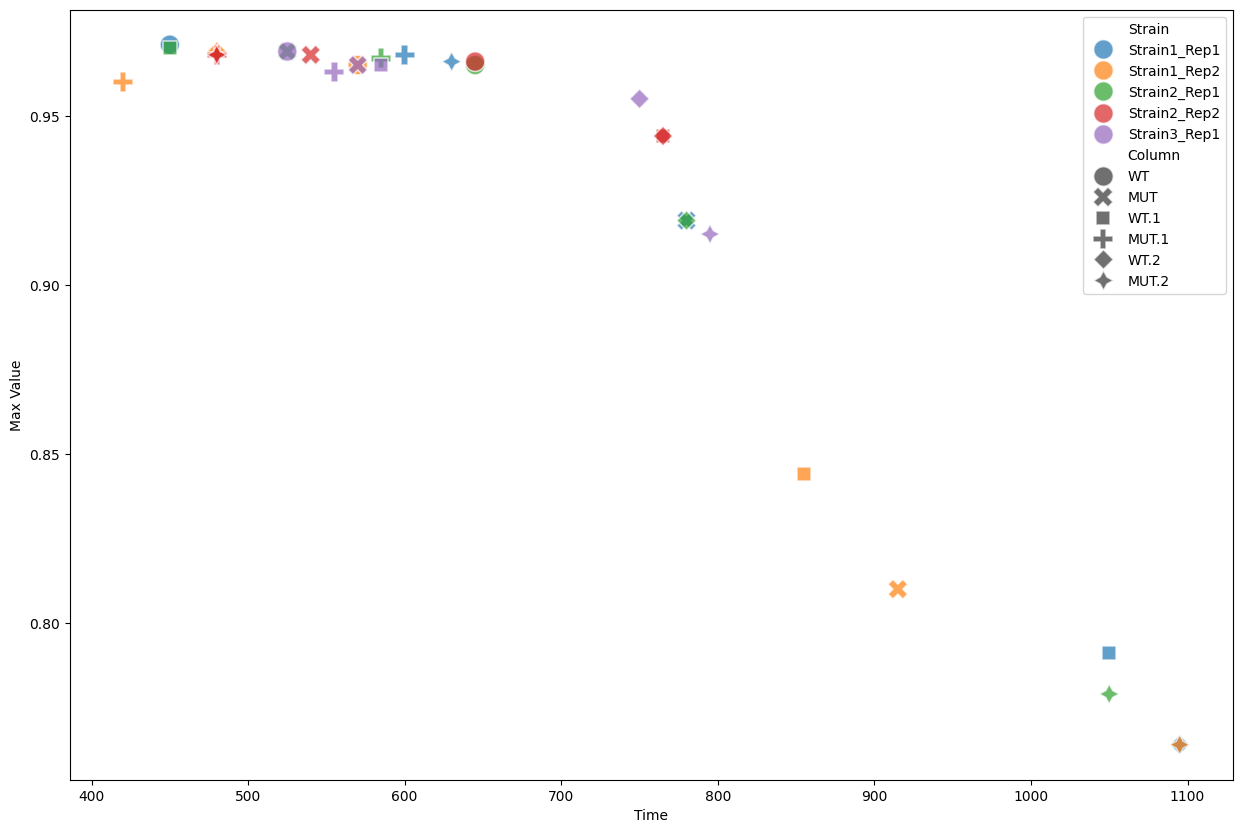

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Time', y='Max Value', hue='Strain', data=new_df,style='Column', s=200, alpha=0.7)
plt.show()

In [ ]:
new_df['Strain'] = new_df['Strain'].str.replace(r'_Rep[12]', '', regex=True)
new_df['Column'] = new_df['Column'].str.replace(r'WT.[12]', 'WT', regex=True)
new_df['Column'] = new_df['Column'].str.replace(r'MUT.[12]', 'MUT', regex=True)
new_df

,Strain,Column,Time,Max Value
0,Strain1,WT,450,0.971
1,Strain1,MUT,780,0.919
2,Strain1,WT,1050,0.791
3,Strain1,MUT,600,0.968
4,Strain1,WT,1095,0.764
5,Strain1,MUT,630,0.966
6,Strain1,WT,570,0.965
7,Strain1,MUT,915,0.810
8,Strain1,WT,855,0.844
9,Strain1,MUT,420,0.960


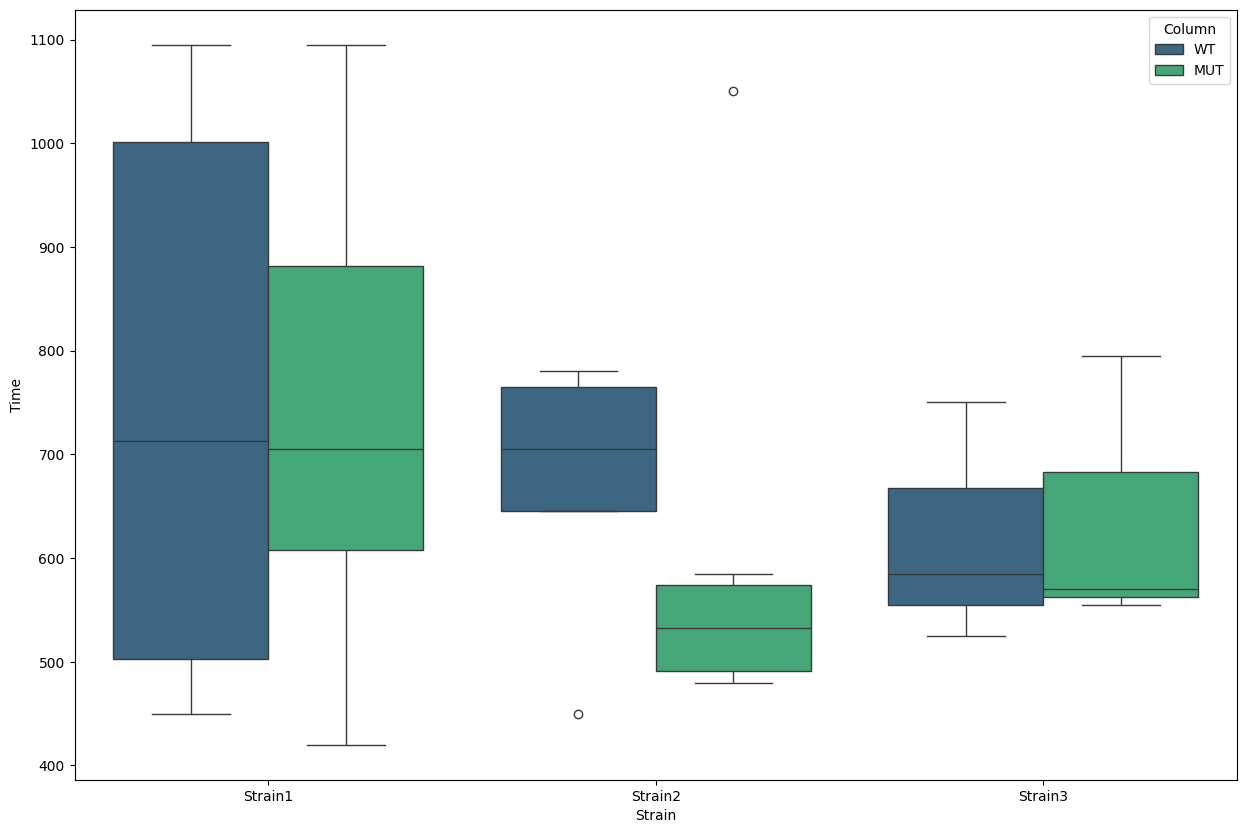

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Strain', y='Time', data=new_df, palette='viridis', hue='Column')
plt.xlabel('Strain')
plt.ylabel('Time')
plt.show()

In [ ]:
from scipy.stats import shapiro, levene

# Separate data into WT and MUT
wt_time = new_df[new_df['Column'] == 'WT']['Time']
mut_time = new_df[new_df['Column'] == 'MUT']['Time']

# Normality test
print("Shapiro-Wilk test for WT:", shapiro(wt_time))
print("Shapiro-Wilk test for MUT:", shapiro(mut_time))

# Homogeneity of variance test
print("Levene's test:", levene(wt_time, mut_time))


Shapiro-Wilk test for WT: ShapiroResult(statistic=0.9100168362430947, pvalue=0.46769157207459366)
Shapiro-Wilk test for MUT: ShapiroResult(statistic=0.8383350899523784, pvalue=0.16037218816351717)
Levene's test: LeveneResult(statistic=0.84, pvalue=0.3861914408126226)


In [ ]:
from scipy import stats

stat, p_value = stats.mannwhitneyu( wt_time, mut_time)
print("T-statistic:", stat)
print("P-value:", p_value)

T-statistic: 9.0
P-value: 0.5270892568655381


In [ ]:
from scipy.stats import kruskal

strain_groups = [new_df[new_df['Strain'] == strain]['Time'] for strain in new_df['Strain'].unique()]
kruskal_stat, kruskal_p = kruskal(*strain_groups)
print(f"Kruskal-Wallis test: H={kruskal_stat:.3f}, p={kruskal_p:.3f}")


Kruskal-Wallis test: H=1.750, p=0.782


In [ ]:
sift = pd.read_csv('https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/sift.tsv', sep='\t', header=0, names=['Protein', 'Amino_Acid', 'sift_Score'])
foldx = pd.read_csv('https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/foldX.tsv', sep='\t', header=0, names=['Protein', 'Amino_Acid', 'foldX_Score'])
sift.head()

,Protein,Amino_Acid,sift_Score
0,A5A607,K60Q,0.197799
1,A5A607,Y56C,0.174970
2,A5A607,Y56S,0.415581
3,A5A630,A16V,0.516738
4,A5A630,A47T,0.387271


In [ ]:
sift['merged'] = sift['Protein'] + '_' + sift['Amino_Acid']
foldx['merged'] = foldx['Protein'] + '_' + foldx['Amino_Acid']
df = pd.merge(sift, foldx, on=['merged', 'Protein', 'Amino_Acid'])
df.head()

,Protein,Amino_Acid,sift_Score,merged,foldX_Score
0,A5A607,K60Q,0.197799,A5A607_K60Q,0.51710
1,A5A607,Y56C,0.174970,A5A607_Y56C,0.72870
2,A5A607,Y56S,0.415581,A5A607_Y56S,0.84212
3,P00350,A117S,0.401519,P00350_A117S,-0.09854
4,P00350,A117T,0.282769,P00350_A117T,0.92352


In [ ]:
df_mut = pd.DataFrame()
for i in df.values:
  if i[2] < 0.05 and i[4] > 2:
    df_mut = pd.concat([df_mut, df.loc[(df['foldX_Score'] == i[4]) & (df['sift_Score'] == i[2])]])

df_mut.head().sort_values(by='Protein', ascending=False)

,Protein,Amino_Acid,sift_Score,merged,foldX_Score
209,P00363,I150F,0.048688,P00363_I150F,9.18496
82,P00350,G48C,0.031864,P00350_G48C,2.25298
100,P00350,L115F,0.028872,P00350_L115F,3.12672
102,P00350,L204F,0.009560,P00350_L204F,3.31406
103,P00350,L208R,0.027592,P00350_L208R,4.38690


<ipython-input-12-13e554e0ad60>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frequency.index, y=frequency.values, palette = 'viridis')


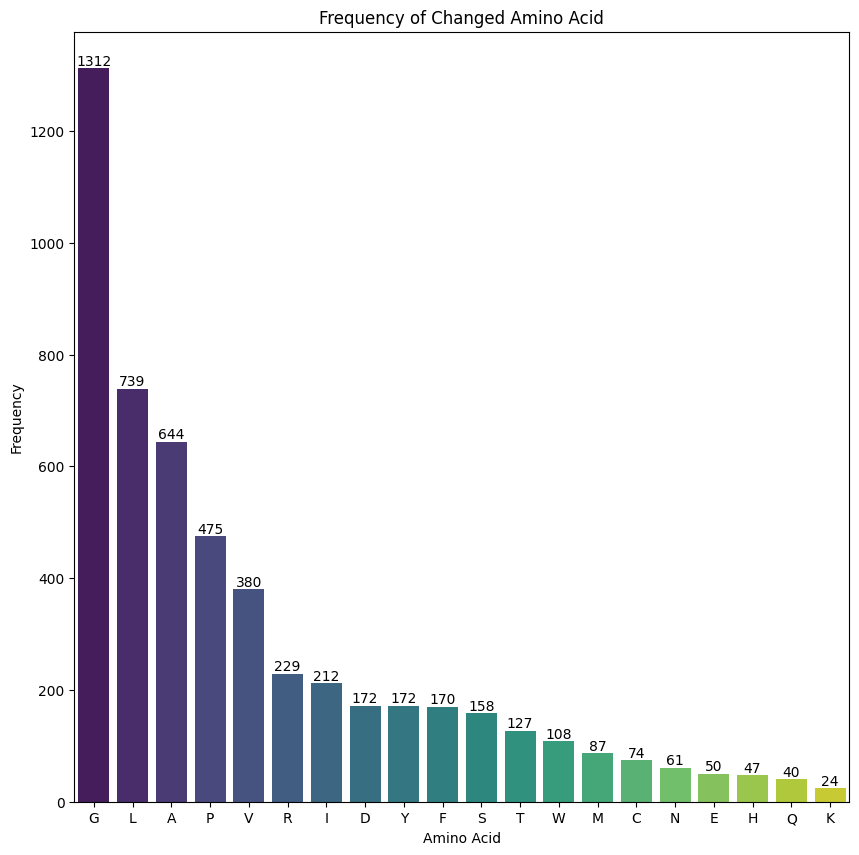

In [ ]:
df_mut['first_amio'] = df_mut['Amino_Acid'].str[0]
frequency = df_mut['first_amio'].value_counts()
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=frequency.index, y=frequency.values, palette = 'viridis')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Frequency of Changed Amino Acid')
plt.show()

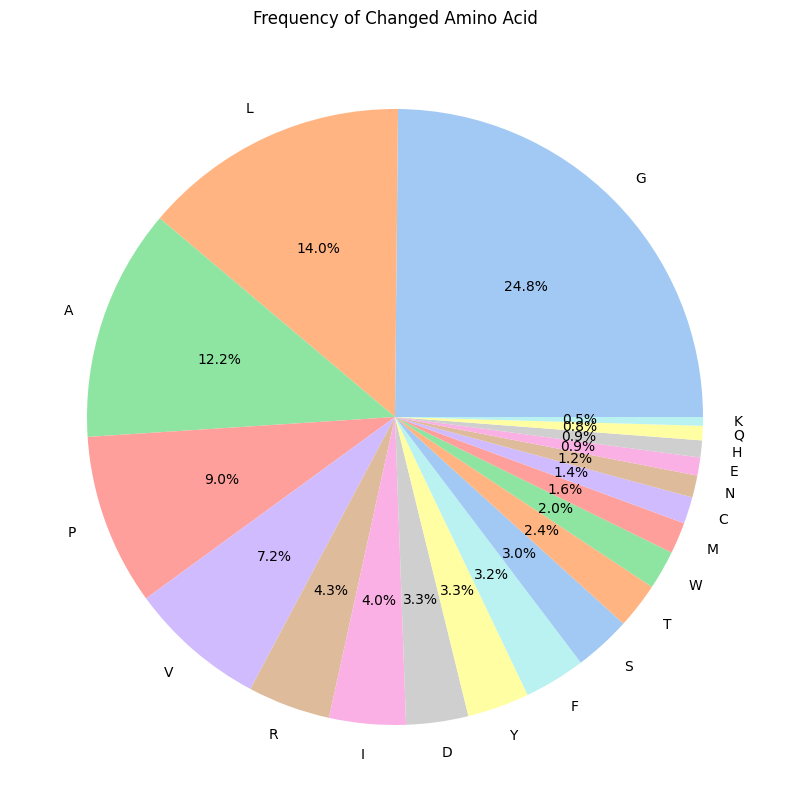

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Frequency of Changed Amino Acid')
plt.show()

## Briefly describe the amino acid with the highest impact on protein structure and function


The amino acid **glycine (G)** has the highest impact on protein structure and function, especially when it undergoes alterations. Glycine is the smallest amino acid, with just a hydrogen atom as its side chain, making it highly flexible. It is often found in tight turns and flexible regions of proteins, where its small size allows for conformational freedom.  

When glycine is altered, it can significantly disrupt protein folding, stability, and function. Substituting glycine with a bulkier or more rigid amino acid can restrict movement, destabilize secondary structures, and impair interactions critical for protein activity. This makes glycine mutations particularly impactful in structural and functional domains of proteins.

## What can you say about the structural property and functional property of amino acids with more than 100 occurences.



### Structural Properties

- **Glycine (G)** – With 1,312 alterations, glycine is the smallest amino acid and provides exceptional flexibility due to its minimal side chain (a single hydrogen atom). Its high alteration frequency suggests that even slight changes here can drastically affect local backbone flexibility, especially in tight turns or loops.

- **Alanine (A)** – With 644 occurrences, alanine is small and non-polar. Its side chain is also minimal, often serving as a structural placeholder that supports alpha-helical conformations without introducing steric hindrance.

- **Proline (P)** – Exhibiting 475 alterations, proline has a unique cyclic structure that imposes conformational rigidity and can induce kinks or breaks in alpha-helices. Its frequent alterations indicate that changes in these rigid regions can significantly affect protein folding.

- **Leucine (L), Isoleucine (I), Valine (V)** – With 739, 212, and 380 alterations respectively, these hydrophobic, branched-chain amino acids are typically found in the protein core. Their side chains contribute to the hydrophobic packing essential for protein stability. Alterations in these residues can affect the tight packing of the hydrophobic core, potentially destabilizing the overall structure.

- **Tryptophan (W)** – With 108 alterations, tryptophan is bulky and aromatic, playing a key role in maintaining protein stability through stacking and hydrophobic interactions. Its lower alteration frequency (relative to, for example, glycine) reflects its critical structural role in maintaining the integrity of protein cores.

---

### Functional Properties

- **Charged Residues (Arginine, Aspartate)**  
  - **Arginine (R)** – With 229 occurrences, arginine is a large, positively charged amino acid. It frequently participates in salt bridges and hydrogen bonding, which are vital for enzymatic active sites and protein–protein interactions.
  - **Aspartate (D)** – With 172 occurrences, aspartate is negatively charged and is often found in active sites, where it participates in catalysis and stabilizes positive charges.

- **Aromatic and Polar Residues (Tyrosine, Phenylalanine, Serine, Threonine)**  
  - **Tyrosine (Y)** – With 172 alterations, tyrosine is aromatic and polar, serving as an important site for phosphorylation. Such modifications regulate protein activity and interactions, making tyrosine critical in signal transduction pathways.
  - **Phenylalanine (F)** – With 170 occurrences, phenylalanine is hydrophobic and aromatic. It is key for stacking interactions and helps stabilize the protein core, affecting overall folding.
  - **Serine (S) and Threonine (T)** – With 158 and 127 alterations respectively, these polar amino acids often participate in hydrogen bonding and can be sites of phosphorylation. Their modifications can alter protein activity, localization, or interactions .

---

### General Implications

- **Flexibility vs. Rigidity:**  
  Amino acids like glycine and alanine, due to their small sizes, contribute to flexibility and minimal steric hindrance. Their high mutation rates may indicate that even minor alterations can have outsized effects on local structure and dynamics.
  
- **Hydrophobic Core Integrity:**  
  Residues such as leucine, isoleucine, valine, and phenylalanine are critical for maintaining the hydrophobic core. Alterations in these residues may disrupt core packing, thereby affecting the overall stability and folding of the protein.
  
- **Catalytic and Interaction Sites:**  
  Charged residues (arginine and aspartate) and phosphorylatable residues (serine, threonine, and tyrosine) play essential roles in catalytic mechanisms and regulatory interactions. Their modifications are likely to influence protein function significantly.

- **Regulatory Roles:**  
  Many of these amino acids are involved in post-translational modifications (such as phosphorylation on tyrosine, serine, and threonine), which are key in regulating protein function, signaling pathways, and interactions.



In [ ]:
'''
### Briefly describe the amino acid with the highest impact on protein structure and function

The amino acid glycine (G) has the highest impact on protein structure and function, especially when it undergoes alterations.
Glycine is the smallest amino acid, with just a hydrogen atom as its side chain, making it highly flexible.
It is often found in tight turns and flexible regions of proteins, where its small size allows for conformational freedom.

When glycine is altered, it can significantly disrupt protein folding, stability, and function.
Substituting glycine with a bulkier or more rigid amino acid can restrict movement, destabilize secondary structures, and impair
interactions critical for protein activity. This makes glycine mutations particularly impactful in structural and functional domains of proteins.


### What can you say about the structural property and functional property of amino acids with more than 100 occurences.

Structural Properties
Glycine (G) – With 1,312 alterations, glycine is the smallest amino acid and provides exceptional flexibility due to its minimal side chain (a single hydrogen atom). Its high alteration frequency suggests that even slight changes here can drastically affect local backbone flexibility, especially in tight turns or loops.

Alanine (A) – With 644 occurrences, alanine is small and non-polar. Its side chain is also minimal, often serving as a structural placeholder that supports alpha-helical conformations without introducing steric hindrance.

Proline (P) – Exhibiting 475 alterations, proline has a unique cyclic structure that imposes conformational rigidity and can induce kinks or breaks in alpha-helices. Its frequent alterations indicate that changes in these rigid regions can significantly affect protein folding.

Leucine (L), Isoleucine (I), Valine (V) – With 739, 212, and 380 alterations respectively, these hydrophobic, branched-chain amino acids are typically found in the protein core. Their side chains contribute to the hydrophobic packing essential for protein stability. Alterations in these residues can affect the tight packing of the hydrophobic core, potentially destabilizing the overall structure.

Tryptophan (W) – With 108 alterations, tryptophan is bulky and aromatic, playing a key role in maintaining protein stability through stacking and hydrophobic interactions. Its lower alteration frequency (relative to, for example, glycine) reflects its critical structural role in maintaining the integrity of protein cores.

Functional Properties
Charged Residues (Arginine, Aspartate)

Arginine (R) – With 229 occurrences, arginine is a large, positively charged amino acid. It frequently participates in salt bridges and hydrogen bonding, which are vital for enzymatic active sites and protein–protein interactions.
Aspartate (D) – With 172 occurrences, aspartate is negatively charged and is often found in active sites, where it participates in catalysis and stabilizes positive charges.
Aromatic and Polar Residues (Tyrosine, Phenylalanine, Serine, Threonine)

Tyrosine (Y) – With 172 alterations, tyrosine is aromatic and polar, serving as an important site for phosphorylation. Such modifications regulate protein activity and interactions, making tyrosine critical in signal transduction pathways.
Phenylalanine (F) – With 170 occurrences, phenylalanine is hydrophobic and aromatic. It is key for stacking interactions and helps stabilize the protein core, affecting overall folding.
Serine (S) and Threonine (T) – With 158 and 127 alterations respectively, these polar amino acids often participate in hydrogen bonding and can be sites of phosphorylation. Their modifications can alter protein activity, localization, or interactions .
General Implications
Flexibility vs. Rigidity:
Amino acids like glycine and alanine, due to their small sizes, contribute to flexibility and minimal steric hindrance. Their high mutation rates may indicate that even minor alterations can have outsized effects on local structure and dynamics.

Hydrophobic Core Integrity:
Residues such as leucine, isoleucine, valine, and phenylalanine are critical for maintaining the hydrophobic core. Alterations in these residues may disrupt core packing, thereby affecting the overall stability and folding of the protein.

Catalytic and Interaction Sites:
Charged residues (arginine and aspartate) and phosphorylatable residues (serine, threonine, and tyrosine) play essential roles in catalytic mechanisms and regulatory interactions. Their modifications are likely to influence protein function significantly.

Regulatory Roles:
Many of these amino acids are involved in post-translational modifications (such as phosphorylation on tyrosine, serine, and threonine), which are key in regulating protein function, signaling pathways, and interactions.

'''
frequency

,count
first_amio,
G,1312
L,739
A,644
P,475
V,380
R,229
I,212
D,172
Y,172


Task 2.6

In [2]:
from typing_extensions import dataclass_transform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL of the data
url = "https://gist.githubusercontent.com/stephenturner/806e31fce55a8b7175af/raw/1a507c4c3f9f1baaa3a69187223ff3d3050628d4/results.txt"

# Function to load data from a URL
def load_data(url):
    """
    Loads data from a URL and returns it as a DataFrame.
    """
    data = pd.read_csv(url, sep="\s+", header=None, names=["Gene", "log2FoldChange", "pvalue", "padj"])

    # Convert 'log2FoldChange' and 'pvalue' columns to numeric
    data['log2FoldChange'] = pd.to_numeric(data['log2FoldChange'], errors='coerce')
    data['pvalue'] = pd.to_numeric(data['pvalue'], errors='coerce')
    return data
print(load_data(url))




          Gene  log2FoldChange        pvalue       padj
0         Gene             NaN           NaN       padj
1         DOK6        0.510000  1.861000e-08  0.0003053
2         TBX5       -2.129000  5.655000e-08  0.0004191
3      SLC32A1        0.900300  7.664000e-08  0.0004191
4       IFITM1       -1.687000  3.735000e-06   0.006809
...        ...             ...           ...        ...
16402     PKLR       -0.000191  9.996000e-01     0.9999
16403    OBFC1       -0.000046  9.998000e-01     0.9999
16404    FKBP8       -0.000055  9.997000e-01     0.9999
16405     LRMP       -0.000037  9.999000e-01          1
16406     OXSM        0.000009  1.000000e+00          1

[16407 rows x 4 columns]


In [3]:
# Function to classify genes based on log2FoldChange and p-value
def classify_genes(data):
    """
    Classifies genes as 'Upregulated', 'Downregulated', or 'Not Significant'
    based on their log2FoldChange and p-value.
    """
    data['Status'] = 'Not Significant'
    data.loc[(data['log2FoldChange'] > 1) & (data['pvalue'] < 0.01), 'Status'] = 'Upregulated'
    data.loc[(data['log2FoldChange'] < -1) & (data['pvalue'] < 0.01), 'Status'] = 'Downregulated'
    return data




Top 5 Upregulated Genes:
       Gene  log2FoldChange    pvalue      padj       Status
21    DTHD1           1.540  0.000056   0.04371  Upregulated
6   EMILIN2           1.534  0.000003  0.006809  Upregulated
30     PI16           1.495  0.000130   0.07794  Upregulated
35  C4orf45           1.288  0.000247    0.1159  Upregulated
75  FAM180B           1.249  0.001146    0.2399  Upregulated
Top 5 Downregulated Genes:
       Gene  log2FoldChange        pvalue       padj         Status
2      TBX5          -2.129  5.655000e-08  0.0004191  Downregulated
4    IFITM1          -1.687  3.735000e-06   0.006809  Downregulated
10      TNN          -1.658  8.973000e-06    0.01472  Downregulated
12  COL13A1          -1.647  1.394000e-05    0.01592  Downregulated
13   IFITM3          -1.610  1.202000e-05    0.01592  Downregulated


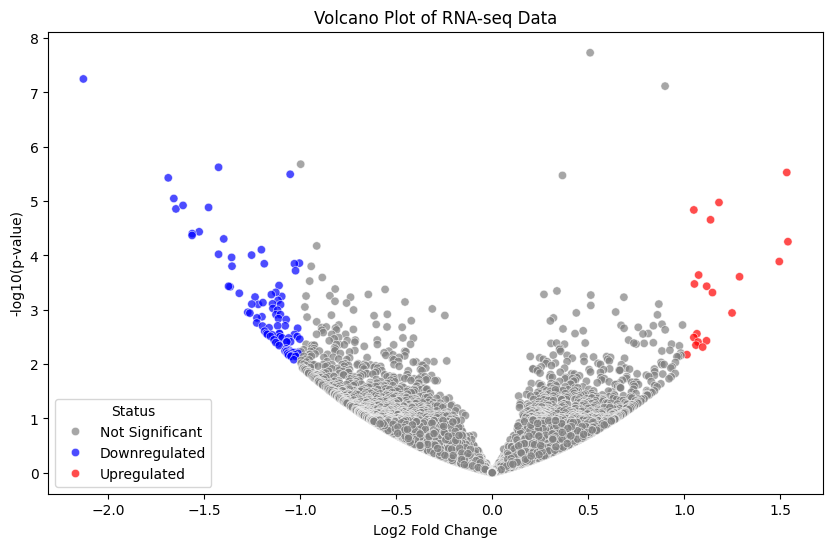

In [ ]:
# Function to display the top upregulated or downregulated genes
def display_top_genes(data, status, n=5):
    """
    Displays the top n upregulated or downregulated genes.
    """
    subset = data[data['Status'] == status]
    if status == 'Upregulated':
        return subset.nlargest(n, 'log2FoldChange')
    elif status == 'Downregulated':
        return subset.nsmallest(n, 'log2FoldChange')

# Function to create a volcano plot
def create_volcano_plot(data):
    """
    Creates a volcano plot to visualize regulated genes.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='log2FoldChange', y=-np.log10(data['pvalue']), hue='Status', data=data,
                    palette={'Upregulated': 'red', 'Downregulated': 'blue', 'Not Significant': 'gray'}, alpha=0.7)
    plt.title('Volcano Plot of RNA-seq Data')
    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-log10(p-value)')
    plt.show()

# Load the data
diseased_cell = load_data(url)

# Classify the genes
diseased_cell = classify_genes(diseased_cell)

# Display the top 5 upregulated genes
print("Top 5 Upregulated Genes:")
print(display_top_genes(diseased_cell, 'Upregulated'))

# Display the top 5 downregulated genes
print("Top 5 Downregulated Genes:")
print(display_top_genes(diseased_cell, 'Downregulated'))

# Create a volcano plot
create_volcano_plot(diseased_cell)

#The function of the gene DTHD1 is protein binding
#The funtions of the gene EMILIN2 are protein binding	and enabling extracellular matrix constituent conferring elasticity
#The functions of the gene PI16 are peptidase inhibitor activity and protein binding
#The function of the gene C4orf45 is protein binding
#The function of the gene FAM180B is protein binding


# Functions of the downregulated genes :
# The funtions of the gene TBX5	is DNA-binding protein that regulates the transcription of several genes and is involved in heart development and limb pattern formation
# The funtions of the gene IFITM1	is inhibiting the entry of viruses to the host cell cytoplasm, permitting endocytosis, but preventing subsequent viral fusion and release of viral contents into the cytosol.
# The funtions of the gene TNN is a ligand for ITGA8:ITGB1, ITGAV:ITGB1 and ITGA4:ITGB1, involved in neurite outgrowth and cell migration in hippocampal explants
# The funtions of the gene COL13A1 is cell-matrix and cell-cell adhesion interactions that are required for normal development.
# The funtions of the gene IFITM3 is disruption of intracellular cholesterol homeostasis.

Task 2.7

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/nhanes.csv', sep=',')
df['nPregnancies'] = df['nPregnancies'].replace(np.nan, 0)
df['nBabies'] = df['nBabies'].replace(np.nan, 0)
df['Education'] = df['Education'].replace(np.nan, 'Unkown')
df['MaritalStatus'] = df['MaritalStatus'].replace(np.nan, 'Unkown')
df['RelationshipStatus'] = df['RelationshipStatus'].replace(np.nan, 'Unkown')
df['SmokingStatus'] = df['SmokingStatus'].replace(np.nan, 'Unkown')
df['DiabetesAge'] = df['DiabetesAge'].replace(np.nan, 'Unkown')
df['SleepHrsNight'] = df['SleepHrsNight'].replace(np.nan, 'Unkown')
df['Work'] = df['Work'].replace(np.nan, 'Unkown')
df['AlcoholYear'] = df['AlcoholYear'].replace(np.nan, 0)
df['AlcoholDay'] = df['AlcoholDay'].replace(np.nan, 0)
df['PhysActiveDays'] = df['PhysActiveDays'].replace(np.nan, 0)
df['PhysActive'] = df['PhysActive'].replace(np.nan, 'Unkown')
df['Income'] = df['Income'].replace(np.nan, 0)
df['Poverty'] = df['Poverty'].replace(np.nan, 0)
df['WeightPounds'] = df['Weight']*2.2
df.head()

,id,Gender,Age,Race,Education,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,...,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus,WeightPounds
0,62163,male,14,Asian,Unkown,Unkown,Unkown,Yes,100000.0,4.07,...,Unkown,0.0,0.0,Unkown,No,1.0,0.0,0.0,Unkown,108.68
1,62172,female,43,Black,High School,NeverMarried,Single,Yes,22500.0,2.02,...,Unkown,3.0,2.0,8.0,No,2.0,3.0,104.0,Current,216.92
2,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,Unkown,0.0,0.0,9.0,No,7.0,0.0,0.0,Never,210.76
3,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,Unkown,0.0,0.0,9.0,No,5.0,0.0,0.0,Never,210.76
4,62175,male,5,White,Unkown,Unkown,Unkown,Yes,12500.0,0.39,...,Unkown,0.0,0.0,Unkown,Unkown,7.0,0.0,0.0,Unkown,52.58


In [ ]:
df.dropna(inplace=True)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 3866 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3866 non-null   int64  
 1   Gender              3866 non-null   object 
 2   Age                 3866 non-null   int64  
 3   Race                3866 non-null   object 
 4   Education           3866 non-null   object 
 5   MaritalStatus       3866 non-null   object 
 6   RelationshipStatus  3866 non-null   object 
 7   Insured             3866 non-null   object 
 8   Income              3866 non-null   float64
 9   Poverty             3866 non-null   float64
 10  HomeRooms           3866 non-null   float64
 11  HomeOwn             3866 non-null   object 
 12  Work                3866 non-null   object 
 13  Weight              3866 non-null   float64
 14  Height              3866 non-null   float64
 15  BMI                 3866 non-null   float64
 16  Pulse      

(3866, 33)

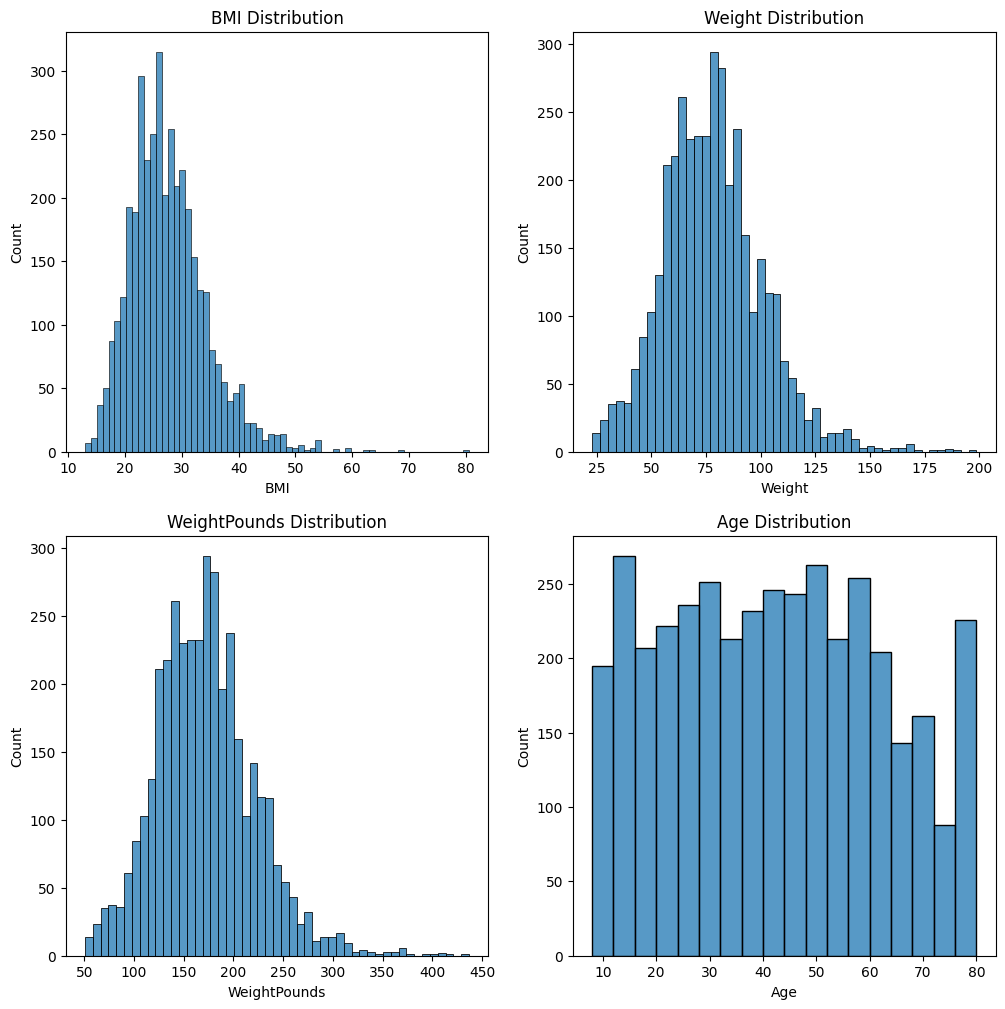

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.histplot(df['BMI'])
plt.title('BMI Distribution')
plt.subplot(2,2,2)
sns.histplot(df['Weight'])
plt.title('Weight Distribution')
plt.subplot(2,2,3)
sns.histplot(df['WeightPounds'])
plt.title('WeightPounds Distribution')
plt.subplot(2,2,4)
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.show()

In [ ]:
print(df['Pulse'].mean())
print(df['BPDia'].min(),'-', df['BPDia'].max())
print(df['Income'].var(), '-', df['Income'].std())

73.58096223486808
0.0 - 116.0
1251173122.786046 - 35371.925630166734


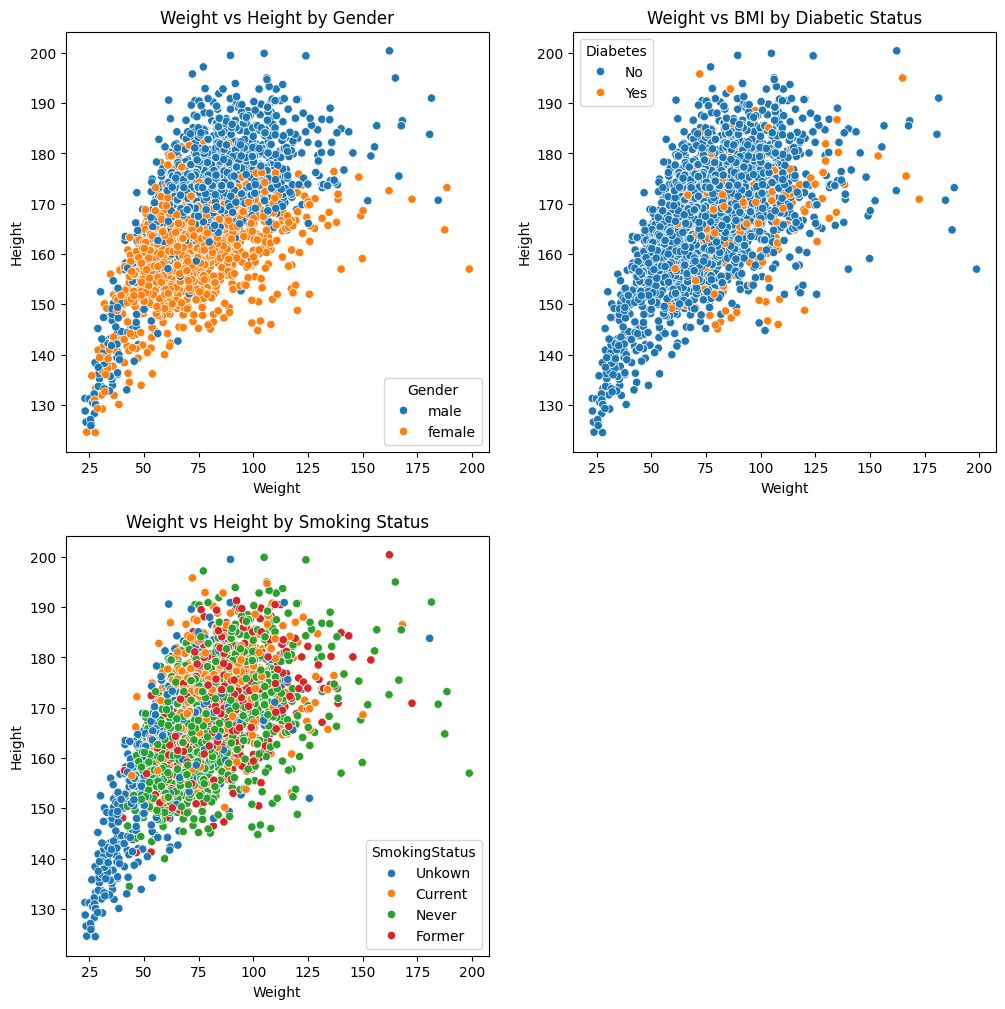

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.scatterplot(data=df, x='Weight', y='Height', hue='Gender')
plt.title('Weight vs Height by Gender')
plt.subplot(2,2,2)
sns.scatterplot(data=df, x='Weight', y='Height', hue='Diabetes')
plt.title('Weight vs BMI by Diabetic Status')
plt.subplot(2,2,3)
sns.scatterplot(data=df, x='Weight', y='Height', hue='SmokingStatus')
plt.title('Weight vs Height by Smoking Status')
plt.show()

In [ ]:
from scipy import stats
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)
df['Diabetes'] = pd.get_dummies(df['Diabetes'], drop_first=True)
df= df[df['RelationshipStatus'] != 'Unkown']
df['RelationshipStatus'] = pd.get_dummies(df['RelationshipStatus'], drop_first=True)

t_stat, p_value = stats.ttest_ind(df['Age'], df['Gender'])
print(t_stat, p_value)
t_stat, p_value = stats.ttest_ind(df['AlcoholYear'], df['RelationshipStatus'])
print(t_stat, p_value)
t_stat, p_value = stats.ttest_ind(df['BMI'], df['Diabetes'])
print(t_stat, p_value)

165.4658066141152 0.0
37.40561916873719 6.648928444894326e-280
nan nan
